In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [14]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

In [108]:
dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/dat_la_2019_2020_intra_day_group.csv",parse_dates=['date'], date_parser=dateparse)

In [109]:
dat.head()

,Unnamed: 0,month,date,X00.00,X01.00,X02.00,X03.00,X04.00,X05.00,X06.00,...,X15.00,X16.00,X17.00,X18.00,X19.00,X20.00,X21.00,X22.00,X23.00,total_load
0,1,1,2019-01-16,2792.935484,2621.677419,2507.838710,2430.161290,2394.419355,2439.032258,2603.451613,...,3059.548387,3080.806452,3185.548387,3422.612903,3462.096774,3431.870968,3373.129032,3238.677419,3014.032258,71396.29032
1,13,1,2020-01-16,2677.129032,2514.548387,2403.935484,2336.612903,2308.838710,2348.064516,2491.096774,...,2907.516129,2919.354839,3012.709677,3229.258065,3272.096774,3231.483871,3169.064516,3061.967742,2873.580645,67915.03226
2,2,2,2019-02-14,2875.250000,2704.642857,2588.392857,2522.250000,2490.535714,2533.500000,2674.464286,...,3099.285714,3078.250000,3104.642857,3290.857143,3449.321429,3439.250000,3391.178571,3276.571429,3078.535714,72431.57143
3,14,2,2020-02-15,2698.931034,2549.689655,2449.793103,2385.000000,2357.137931,2401.482759,2552.931034,...,2974.034483,2980.827586,3041.344828,3190.275862,3306.103448,3268.206897,3196.034483,3070.896552,2882.655172,68506.24138
4,3,3,2019-03-16,2619.400000,2453.400000,2335.833333,2262.933333,2228.600000,2262.100000,2399.466667,...,2947.800000,2945.300000,2946.533333,2982.366667,3053.300000,3152.533333,3128.233333,3013.400000,2816.066667,66356.53333


<ipython-input-110-1411374d4d36>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['Time']=idx
<ipython-input-110-1411374d4d36>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['Time']=idx
<ipython-input-110-1411374d4d36>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

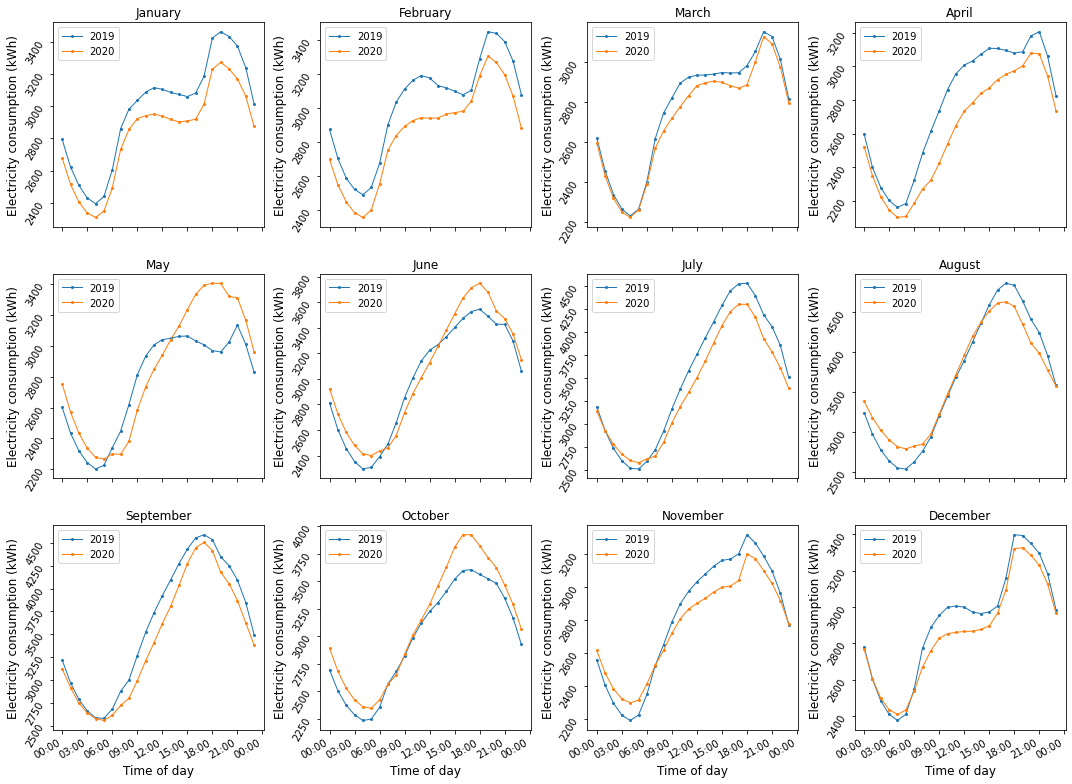

In [110]:
dat['year'] = dat['date'].dt.year
titles=['January','February','March','April','May','June','July','August','September','October','November','December']
labels=[1,2,3,4,5,6,7,8,9,10,11,12]
idx=pd.date_range("2019-01-01 00:00", "2019-01-01 23:30", freq = "60min")
#fig, ax = plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,15)
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
fig = plt.figure()
fig.set_size_inches(15,11)
for c,num in zip(labels, range(1,13)):
    df=dat[dat['month']==c]
    dat1=df.T
    dat1.columns=[df.T.loc['year'].reset_index(drop=True)[0],df.T.loc['year'].reset_index(drop=True)[1]]
    dat2=dat1.iloc[3:27,:]
    dat2['Time']=idx
    ax = fig.add_subplot(3,4,num)
    ax.plot(dat2['Time'], dat2[2019], linewidth = 1,marker='o',markersize=2,label="2019")
    ax.plot(dat2['Time'], dat2[2020], linewidth = 1,marker='o',markersize=2,label="2020")
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.legend( loc = 'best',prop={ 'size':10})
    ax.set_title(titles[c-1])
    ax.tick_params(labelrotation=60)
    fig.autofmt_xdate()
    plt.xlabel('Time of day',fontdict={'size':12})
    plt.ylabel('Electricity consumption (kWh)',fontsize=12)
    #ax.set_ylim(2000,5000)
    
#fig.suptitle('Intra-day electricity usage in Las',fontsize=18)
plt.tight_layout()
#fig.subplots_adjust(top=0.95)
plt.show()